In [1]:
import assignment.load as load
import assignment.display as display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load.load_data(load.DEFAULT_PATH)

In [3]:
from assignment.classify import WeightedKNearestNeighbour
from assignment.dimensionality import PCAReducer
from assignment.pipeline import Pipeline

nn_fuzzy = WeightedKNearestNeighbour(k=1, fuzzy=True)
nn_not_fuzzy = WeightedKNearestNeighbour(k=1, fuzzy=False)

pca_40 = lambda: PCAReducer(n=10)

pipeline1 = Pipeline(nn_fuzzy, [pca_40()])
pipeline1.train(data._raw_data['train_data'], data._raw_data['train_labels'])
pipeline2 = Pipeline(nn_not_fuzzy, [pca_40()])
pipeline2.train(data._raw_data['train_data'], data._raw_data['train_labels'])

In [4]:
pipeline1._reducers[0].reduce(data.wordsearch1.get_letter_at((0, 0))._raw_data)

array([ 1027.17607445,  -161.46163978,   126.68235404,    57.69800762,
          21.31048363,     2.13734934,    92.16064648,    -9.89690695,
         -94.87026309,   -55.09768436])

In [5]:
import numpy as np

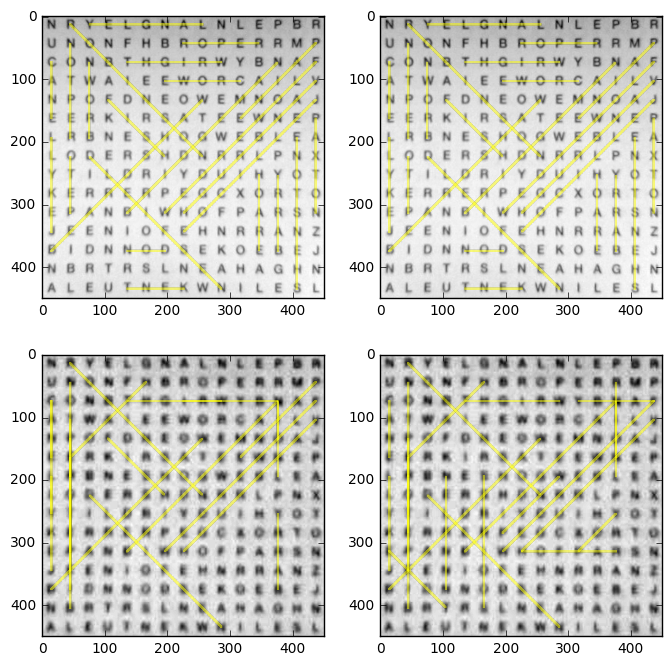

In [6]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
data.wordsearch1.classify(pipeline1)
data.wordsearch1.find_all_and_show(rad=2)

plt.subplot(2, 2, 2)
data.wordsearch1.classify(pipeline2)
data.wordsearch1.find_all_and_show(rad=2)

plt.subplot(2, 2, 3)
data.wordsearch2.classify(pipeline1)
data.wordsearch2.find_all_and_show(rad=2)

plt.subplot(2, 2, 4)
data.wordsearch2.classify(pipeline2)
data.wordsearch2.find_all_and_show(rad=2)

In [7]:
data.wordsearch2.classify(pipeline2)
p = data.wordsearch2.correctness_score(only_score=False)

data.wordsearch2.classify(pipeline1)
q = data.wordsearch2.correctness_score(only_score=False)
(p, q)

((10,
  {'barry': (((12, 12), (11, 6)), ((14, 2), (8, 1))),
   'brown': (((2, 6), (1, 0)), ((12, 6), (11, 0))),
   'crowe': (((10, 3), (4, 2)), ((1, 7), (0, 11))),
   'don': (((6, 12), (2, 11)), ((12, 8), (8, 10))),
   'fish': (((3, 4), (6, 7)), ((6, 9), (9, 4))),
   'hoare': (((11, 8), (10, 12)), ((5, 1), (-1, 5))),
   'jellicoe': (((14, 4), (5, 11)), ((5, 6), (4, 13))),
   'kent': (((7, 14), (2, 13)), ((0, 10), (3, 13))),
   'langley': (((8, 0), (0, -1)), ((3, 12), (2, 4))),
   'paine': (((14, 1), (8, 5)), ((12, 5), (11, -1))),
   'paxton': (((14, 5), (13, 10)), ((12, 10), (5, 9))),
   'peto': (((1, 10), (0, 5)), ((1, 6), (0, 9))),
   'roper': (((7, 1), (11, 0)), ((1, 8), (0, 2))),
   'shenstone': (((13, 14), (12, 4)), ((1, 13), (0, 3)))}),
 (14,
  {'brown': (((2, 6), (1, 0)), ((12, 6), (11, 0))),
   'crowe': (((10, 3), (4, 2)), ((1, 7), (0, 11))),
   'don': (((6, 12), (2, 11)), ((12, 4), (11, 0))),
   'hoare': (((11, 8), (10, 12)), ((5, 1), (-1, 5))),
   'jellicoe': (((14, 4), (5, 1

In [8]:
data.wordsearch1.classify(pipeline2)
p = data.wordsearch1.correctness_score(only_score=False)

data.wordsearch1.classify(pipeline1)
q = data.wordsearch1.correctness_score(only_score=False)
(p, q)

((24, {}), (24, {}))

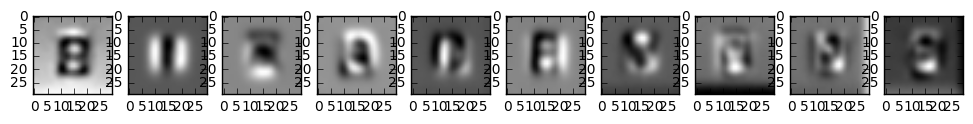

In [9]:
from assignment.data import Letter

plt.figure(figsize=(12, 12))
eigenvectors = pipeline2._reducers[0]._eigenvectors.transpose()
i = 0
for eigenvector in eigenvectors:
    i += 1
    plt.subplot(1, eigenvectors.shape[0], i)
    Letter(raw_data=eigenvector).show()